<a href="https://colab.research.google.com/github/Namsik-Yoon/pytorch_basic/blob/master/5_1_%EC%9D%B8%EA%B3%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D_with_My_data%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST데이터를 바탕으로 MLP 소프트맥스 회귀모델 학습

# Data Load

In [0]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import optim
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


In [3]:
X,y = mnist_train[0]
print('X size = ',X.size())
print('입력 이미지를 [batch_size × 784]의 크기로 reshape = ',X.view(-1, 28*28).size())

X size =  


torch.Size([1, 28, 28])
입력 이미지를 [batch_size × 784]의 크기로 reshape =  torch.Size([1, 784])


# Data visualizing

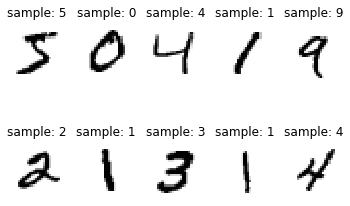

In [4]:
images_and_labels = list(zip(mnist_train.data, mnist_train.targets))
for index, (image, label) in enumerate(images_and_labels[:10]): # 10개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [5]:
for i in range(10):
  print(i,'번 인덱스 샘플의 레이블 : ',mnist_train.targets[i])

0 번 인덱스 샘플의 레이블 :  tensor(5)
1 번 인덱스 샘플의 레이블 :  tensor(0)
2 번 인덱스 샘플의 레이블 :  tensor(4)
3 번 인덱스 샘플의 레이블 :  tensor(1)
4 번 인덱스 샘플의 레이블 :  tensor(9)
5 번 인덱스 샘플의 레이블 :  tensor(2)
6 번 인덱스 샘플의 레이블 :  tensor(1)
7 번 인덱스 샘플의 레이블 :  tensor(3)
8 번 인덱스 샘플의 레이블 :  tensor(1)
9 번 인덱스 샘플의 레이블 :  tensor(4)


# Model1 Building

In [0]:
# dataset loader
batch_size = 100

train_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, # 배치 크기는 100
                         shuffle=True,
                         drop_last=True)

val_loader = DataLoader(dataset=mnist_test,
                         batch_size=len(mnist_test))

In [0]:
class Model1(nn.Module):    
    def __init__(self):
        super(Model1,self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512), # input_layer = 784, hidden_layer1 = 512
            nn.ReLU(),
            nn.Linear(512, 256), # hidden_layer2 = 512, hidden_layer3 = 256
            nn.ReLU(),
            nn.Linear(256, 128), # hidden_layer3 = 256, output_layer = 128
            nn.ReLU(),
            nn.Linear(128, 64), # hidden_layer4 = 128, output_layer = 64
            nn.ReLU(),
            nn.Linear(64, 32), # hidden_layer5 = 64, output_layer = 32
            nn.ReLU(),
            nn.Linear(32, 10) # output_layer6 = 32, output_layer = 10
            )

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.model(x)

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_1 = Model1().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_1.parameters(),lr=0.05)

epochs = 10

In [17]:
plot_list = {'train':[],'val':[],'accuracy':[]}

for epoch in range(epochs):
    model_1.train()
    train_losses = []
    for i,data in enumerate(train_loader):
        optimizer.zero_grad()
        inputs,targets = data[0].to(device), data[1].to(device)

        outputs = model_1(inputs)
        train_loss = criterion(outputs,targets)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss.item())

    model_1.eval()
    val_losses = []
    for i,data in enumerate(val_loader):
        inputs,targets = data[0].to(device), data[1].to(device)

        outputs = model_1(inputs)
        val_loss = criterion(outputs,targets)
        val_losses.append(val_loss.detach())

        prob,label = torch.exp(outputs).topk(1,dim=1)
    correct = label.view(-1)==targets
    val_accuracy = correct.float().mean()

    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}")
    print(f"{epoch+1} epoch accuracy = {val_accuracy}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(sum(val_losses)/len(val_losses))
    plot_list['accuracy'].append(val_accuracy)

1 epoch train loss = 2.287061572869619
1 epoch val loss = 2.1845006942749023
1 epoch accuracy = 0.33709999918937683
--------------------------------------------------
2 epoch train loss = 1.1017076926926772
2 epoch val loss = 0.4984362721443176
2 epoch accuracy = 0.8585000038146973
--------------------------------------------------
3 epoch train loss = 0.3553735506658753
3 epoch val loss = 0.23541313409805298
3 epoch accuracy = 0.9327999949455261
--------------------------------------------------
4 epoch train loss = 0.20387143285324177
4 epoch val loss = 0.1714925616979599
4 epoch accuracy = 0.9502999782562256
--------------------------------------------------
5 epoch train loss = 0.14711323340733845
5 epoch val loss = 0.14109326899051666
5 epoch accuracy = 0.9572999477386475
--------------------------------------------------
6 epoch train loss = 0.10911311169775824
6 epoch val loss = 0.1179732158780098
6 epoch accuracy = 0.9645999670028687
--------------------------------------------

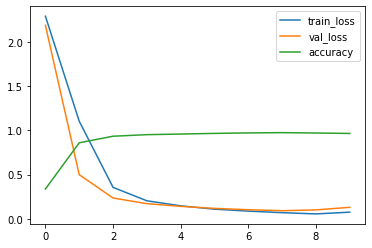

In [18]:
plt.plot(plot_list['train'],label = 'train_loss')
plt.plot(plot_list['val'],label = 'val_loss')
plt.plot(plot_list['accuracy'],label = 'accuracy')
plt.legend()
plt.show()

In [0]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    import numpy as np
    import itertools
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

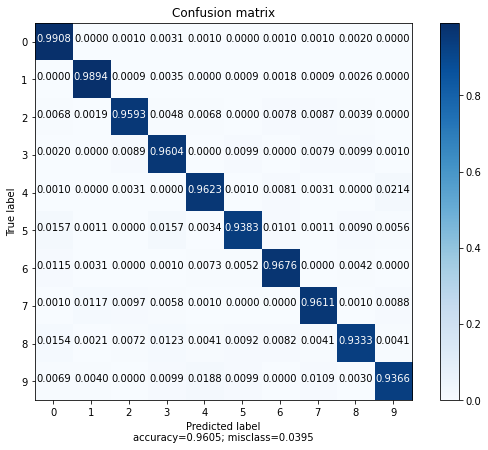

In [26]:
from sklearn.metrics import confusion_matrix
metrics = confusion_matrix(targets.cpu(),label.cpu())
plot_confusion_matrix(metrics,target_names=[0,1,2,3,4,5,6,7,8,9])

# Model2 Building

In [0]:
class Model2(nn.Module):    
    def __init__(self):
        super(Model2,self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512), # input_layer = 784, hidden_layer1 = 512
            nn.ELU(),
            nn.Linear(512, 256), # hidden_layer2 = 512, hidden_layer3 = 256
            nn.ELU(),
            nn.Linear(256, 128), # hidden_layer3 = 256, output_layer = 128
            nn.ELU(),
            nn.Linear(128, 64), # hidden_layer4 = 128, output_layer = 64
            nn.ELU(),
            nn.Linear(64, 32), # hidden_layer5 = 64, output_layer = 32
            nn.ELU(),
            nn.Linear(32, 10) # output_layer6 = 32, output_layer = 10
            )

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.model(x)

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_2 = Model2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_2.parameters(),lr=0.05)

epochs = 10

In [29]:
plot_list = {'train':[],'val':[],'accuracy':[]}

for epoch in range(epochs):
    model_2.train()
    train_losses = []
    for i,data in enumerate(train_loader):
        optimizer.zero_grad()
        inputs,targets = data[0].to(device), data[1].to(device)

        outputs = model_2(inputs)
        train_loss = criterion(outputs,targets)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss.item())

    model_2.eval()
    val_losses = []
    for i,data in enumerate(val_loader):
        inputs,targets = data[0].to(device), data[1].to(device)

        outputs = model_2(inputs)
        val_loss = criterion(outputs,targets)
        val_losses.append(val_loss.detach())

        prob,label = torch.exp(outputs).topk(1,dim=1)
    correct = label.view(-1)==targets
    val_accuracy = correct.float().mean()

    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}")
    print(f"{epoch+1} epoch accuracy = {val_accuracy}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(sum(val_losses)/len(val_losses))
    plot_list['accuracy'].append(val_accuracy)

1 epoch train loss = 1.3356334225833415
1 epoch val loss = 0.4603992700576782
1 epoch accuracy = 0.8677999973297119
--------------------------------------------------
2 epoch train loss = 0.3792572692036629
2 epoch val loss = 0.3079390823841095
2 epoch accuracy = 0.9077999591827393
--------------------------------------------------
3 epoch train loss = 0.2955732110887766
3 epoch val loss = 0.2677537202835083
3 epoch accuracy = 0.9187999963760376
--------------------------------------------------
4 epoch train loss = 0.25111774370074275
4 epoch val loss = 0.23916159570217133
4 epoch accuracy = 0.9276999831199646
--------------------------------------------------
5 epoch train loss = 0.21730919532167414
5 epoch val loss = 0.19741204380989075
5 epoch accuracy = 0.9411999583244324
--------------------------------------------------
6 epoch train loss = 0.18902403541530172
6 epoch val loss = 0.17858809232711792
6 epoch accuracy = 0.9449999928474426
-------------------------------------------

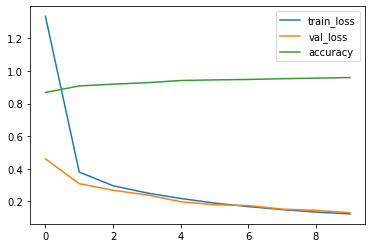

In [30]:
plt.plot(plot_list['train'],label = 'train_loss')
plt.plot(plot_list['val'],label = 'val_loss')
plt.plot(plot_list['accuracy'],label = 'accuracy')
plt.legend()
plt.show()

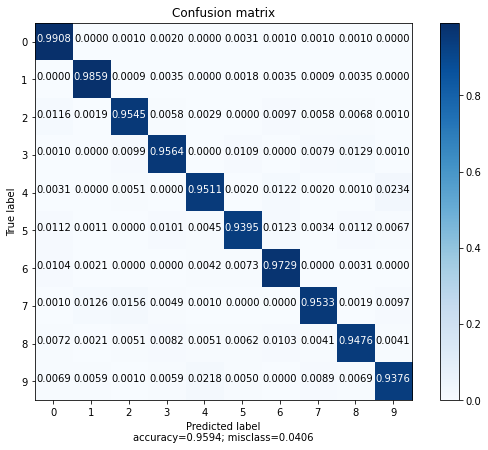

In [31]:
metrics = confusion_matrix(targets.cpu(),label.cpu())
plot_confusion_matrix(metrics,target_names=[0,1,2,3,4,5,6,7,8,9])